## ESADE MIBA Artifitial Intelligence Final Project 
### Team Magic Leap (formerly known as Team WWDC 2017)

#### Team Member: Nancy Xiaowen Jiang, Che-Min Tsai, Lifu Zuo

##### Agenda
1. Define the digital event 
2. Definition of the problem (comment lines will be added later in the following notebooks)
3. Scrap the data
4. Clean the dataset (Including Topic analysis)
5. Identify several types of users using different methods
6. Propose a variable for a selected variable that is easy to explain to a decision-maker
7. Propose a variable for the same selected variable that is as accurate as possible

#### In this notebook, we will cover Part 6 & 7

In [1]:
%pylab inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")

ERROR:root:File `'helper_functions.py'` not found.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# A helper function to display the tree.
# NOTE: requires pydotplus and graphviz libraries. 
    
from IPython.display import Image 
import pydotplus
def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 

### Load the dataset

In [3]:
#Get the cleaned data we done before
clean_df = pd.read_csv("C:/Users/maximjxw/Desktop/AI Final Project/clean_data.csv", index_col = 0)
clean_df1 = pd.DataFrame(clean_df)
clean_df1.head()

,full_text,favorite_count,retweet_count,text_number,location,user_followers,user_friends,user_listed,user_favourites_count,user_statuses_number,Is_this_a_retweet,retweet_fulltext,tweet_create_date,tweet_create_time,user_create_date,user_create_time
0,People are freaking out over the @magicleap pr...,0,0,105,"New York, NY",2323200,4026,44594,7814,174691,0,0,2017-12-20,19:30:22,2007-3-28,22:39:21
1,Google’s Magic Leap Just Revealed An Impressiv...,0,0,73,NaN,0,128,0,1,9,0,0,2018-1-01,00:16:42,2017-12-03,21:11:06
2,"RT @magicleap: World, meet Magic Leap One. Mag...",0,1570,131,Vancouver,1007,1231,32,1567,4990,1,"World, meet Magic Leap One. Magic Leap One, me...",2017-12-20,19:30:24,2011-6-05,20:55:09
3,"After 6 years and $1.9 billion in funding, sec...",0,0,110,"Baketown California, USA",15560,4199,162,26350,32491,0,0,2017-12-20,19:30:13,2010-11-20,03:40:07
4,"Here it is, people, the @magicleap One: https:...",0,0,87,"San Francisco, CA",169,208,133,77,1993,0,0,2017-12-20,19:30:12,2016-1-21,17:52:00


In [4]:
#identify whether a tweet is liked or not
favorited = []
for i in clean_df1['favorite_count']:
    if i == 0:
        favorited.append(0)
    else:
        favorited.append(1)

clean_df1.loc[:,'favorited'] = favorited
clean_df1[['favorite_count','favorited']]

,favorite_count,favorited
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Now we will implement further analysis:

- First we will focus on models that is easy to be explained by the decision maker (Decision Tree)
- Then we will focus more on models to be more accurate

#### 1. Models that easy to explain —— Decision Tree

In [5]:
#clean datasets with only numerical information
X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

feature_names = X_data.columns
class_labels = ["Not favorited", "Favorited"]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)


# score at training
score_test = tree.fit(X,y).score(X, y)
print("Accuracy Training         :", score_test)

scores = cross_val_score(tree, X, y, cv=10)
print("Accuracy Cross Validation : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Training         : 0.919489836588
Accuracy Cross Validation : 0.90 (+/- 0.03)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,10)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best score:  0.907370517928


#### Random Forest

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_leaf_nodes=4)
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

Accuracy: 0.89 (+/- 0.01)


retweet_count            0.303307
Is_this_a_retweet        0.244584
user_followers           0.187973
text_number              0.148145
user_listed              0.063353
user_favourites_count    0.043050
user_friends             0.009588
user_statuses_number     0.000000
dtype: float64

Now further analysis for this dataset and plot the tree:

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best score:  0.906972111554


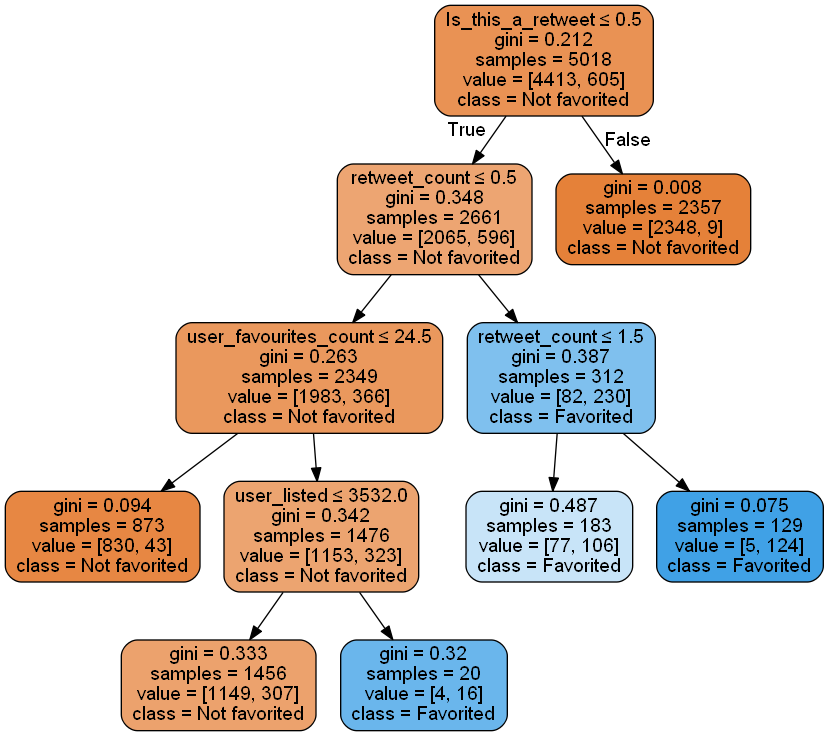

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           #'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,7)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


Image(plot_tree(grid.best_estimator_, feature_names, class_labels))

In [10]:
important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

retweet_count            0.200718
user_favourites_count    0.128685
text_number              0.124427
user_statuses_number     0.120209
Is_this_a_retweet        0.115619
user_listed              0.113627
user_friends             0.099000
user_followers           0.097716
dtype: float64

##### GradientBoostingClassifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier()
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

Accuracy: 0.91 (+/- 0.02)


user_statuses_number     0.199351
text_number              0.167305
user_listed              0.121151
retweet_count            0.111040
user_followers           0.110957
Is_this_a_retweet        0.106955
user_friends             0.103648
user_favourites_count    0.079594
dtype: float64

#### To summarize, we build the decision tree model to determine whether a tweet is favorited or not. We found that the two most important features are retweet count and text number.

#### 2. Models that are more accurate

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First we use linear regression:

D:\PythonSoftware\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Model Favorited - R2: 0.1740



Coefficients [Diameter] [Toppings]  [  1.50243988e-06   1.34928147e-03  -2.45773213e-01  -2.10535581e-08
   1.69494277e-06   1.75374748e-05   4.45211060e-07  -1.08002009e-07]
R-squared of the train model: 0.1709
R-squared of the test model: 0.1740


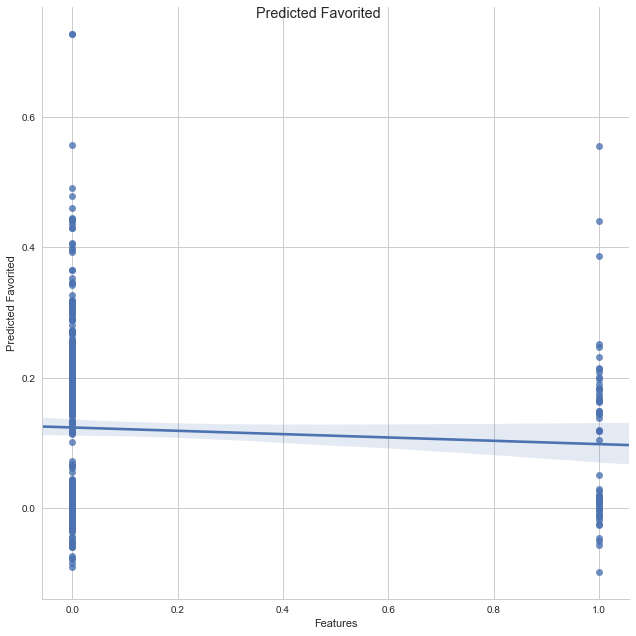

In [13]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.33)

model1=LinearRegression()
model1.fit(X_train,Y_train)
print("Model Favorited - R2: {0:.4f}".format(model1.score(X_test,Y_test)))
print()


dfRM=pd.DataFrame()
dfRM["I"]=range(1,len(Y_test)+1)
dfRM["Features"]=Y_test
dfRM["Predicted Favorited"]=model1.predict(X_test)
sns.lmplot(x="Features",y="Predicted Favorited", data=dfRM, size=9)
plt.suptitle("Predicted Favorited")

print("Coefficients [Diameter] [Toppings] ",model1.coef_)

print("R-squared of the train model: {0:.4f}".format(model1.score(X,y)))
print("R-squared of the test model: {0:.4f}".format(model1.score(X_test,Y_test)))


#### Clearly, the linear regression prediction is not so accurate, only with a 0.1338 R-squared

X (1rst element only) [      0     105       0 2323200    4026   44594    7814  174691]
X transformed to a polynomial degree 2 [  0.00000000e+00   1.05000000e+02   0.00000000e+00   2.32320000e+06
   4.02600000e+03   4.45940000e+04   7.81400000e+03   1.74691000e+05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.10250000e+04   0.00000000e+00   2.43936000e+08   4.22730000e+05
   4.68237000e+06   8.20470000e+05   1.83425550e+07   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   5.39725824e+12   9.35320320e+09   1.03600781e+11
   1.81534848e+10   4.05842131e+11   1.62086760e+07   1.79535444e+08
   3.14591640e+07   7.03305966e+08   1.98862484e+09   3.48457516e+08
   7.79017045e+09   6.10585960e+07   1.36503547e+09   3.05169455e+10]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept & Coefficients  0.034861060359 [  7.53464891e-03   1.40739445e-03  -5.62908558e-02  -4.71528421e-07
  -4.05432805e-06   1.27158279e-04   4.85928796e-06  -4.17345305e-07
   1.64438076e-09   7.16720179e-07  -7.64025874e-03  -3.60637958e-09
   1.14316999e-08  -3.91062540e-08  -5.53370290e-10   6.98273549e-10
  -1.57954364e-07  -7.46205782e-04   1.87295003e-09   5.49449999e-08
  -2.17110995e-07  -9.43859477e-09  -6.17305613e-10  -5.65312333e-02
   1.38911921e-06  -5.23846896e-06  -7.96684225e-05  -2.78982724e-06
   7.40550135e-08   1.20708998e-13  -6.45469388e-12   1.06204038e-11
   2.12539605e-12  -7.73358808e-13   3.88426186e-11  -5.56858792e-10
   1.48821056e-11  -9.59162003e-12  -3.23355797e-09   7.90099160e-11
   8.37547216e-11  -1.53923109e-12  -2.17128876e-12   1.30145894e-13]
R-squared : 0.2467


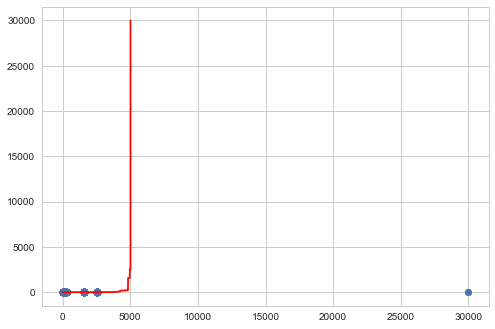

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)

X_poly = poly_features.fit_transform(X)

print("X (1rst element only)",X[0])
print("X transformed to a polynomial degree 2",X_poly[0])

# now we can apply the scikit-learn Linear Regression routines

model = LinearRegression()
model.fit(X_poly, y)

print("Intercept & Coefficients ",model.intercept_,model.coef_)

print("R-squared : {0:.4f}".format(model.score(X_poly,y)))

X=np.sort(X[:,0])

plt.scatter(X,y)
plt.plot(X,c="r")
plt.show()

#### Clearly, this prediction is also not so accurate, only with a R-squared : 0.2467 R-squared

Now we try to use deep learning:

In [15]:
# Import libraries for linear algebra, graphs, and evaluation of results
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.ndimage.filters import uniform_filter1d

In [16]:
# Keras is a high level neural networks library, based on either tensorflow or theano
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import Conv1D, MaxPool1D, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [17]:
# Load the data
X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [18]:
#Scale each observation to zero mean and unit variance
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

In [19]:
x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2)
x_test = np.stack([x_test, uniform_filter1d(x_test, axis=1, size=200)], axis=2)

In [29]:
"""
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=11, activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
"""

"\nmodel = Sequential()\nmodel.add(Conv1D(filters=16, kernel_size=11, activation='relu', input_shape=x_train.shape[1:]))\nmodel.add(MaxPool1D(strides=4))\nmodel.add(BatchNormalization())\nmodel.add(Conv1D(filters=32, kernel_size=11, activation='relu'))\nmodel.add(MaxPool1D(strides=4))\nmodel.add(BatchNormalization())\nmodel.add(Conv1D(filters=64, kernel_size=11, activation='relu'))\nmodel.add(MaxPool1D(strides=4))\nmodel.add(Flatten())\nmodel.add(Dropout(0.5))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n"

In [25]:
def batch_generator(x_train, y_train, batch_size=32):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch

In [27]:
"""
#Start with a slightly lower learning rate, to ensure convergence
model.compile(optimizer=Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=0, epochs=5,
                           steps_per_epoch=x_train.shape[1]//32)
"""

"\n#Start with a slightly lower learning rate, to ensure convergence\nmodel.compile(optimizer=Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])\nhist = model.fit_generator(batch_generator(x_train, y_train, 32), \n                           validation_data=(x_test, y_test), \n                           verbose=0, epochs=5,\n                           steps_per_epoch=x_train.shape[1]//32)\n"

In [28]:
"""
model.compile(optimizer=Adam(4e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=2, epochs=40,
                           steps_per_epoch=x_train.shape[1]//32)
"""

"\nmodel.compile(optimizer=Adam(4e-5), loss = 'binary_crossentropy', metrics=['accuracy'])\nhist = model.fit_generator(batch_generator(x_train, y_train, 32), \n                           validation_data=(x_test, y_test), \n                           verbose=2, epochs=40,\n                           steps_per_epoch=x_train.shape[1]//32)\n"